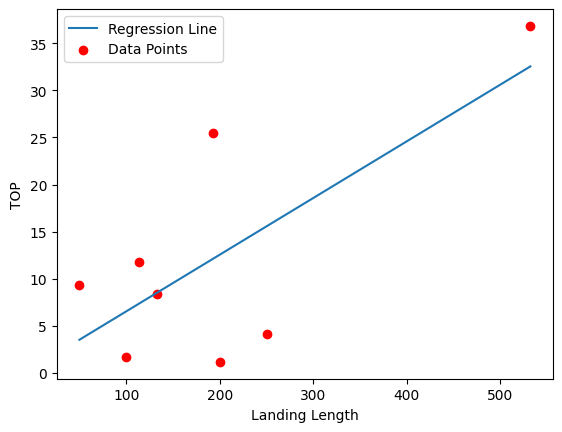

0.5163796867780028
12.54551154127026


In [182]:
"""
Req type	Value 	Unit
Payload 	1	kg
Range	20	km
Cruise Altitude (Max)	400	ft
Cruise speed	10	m/s
Take off distance		
Landing Distance	150	m
Loiter time	30	mins 
		
Additional Data	Value 	Uniti
Cl max	1.8	nan
Vs	18	
roe	1.225	
Sland	191.646	
c	1.2362	
d	 	
TOP	10.68932032	
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from sklearn.linear_model import LinearRegression


# Constants
g = 9.81
rho = 1.225
Clmax = [1.4,1.6,1.8]
Vs = 25
Sland = 191.646
c = 3
d = 0.5
take_off_distance = 200 #m

Clmax = np.array(Clmax)

W_s_stall = 0.5*rho*Vs**2*Clmax[-1]

#TOP
"""
TOP	landing length
1.161342149	200
25.45609524	192.8189593
8.342975207	133.0875
4.172643701	251.00894
9.295800655	50
1.661194904	99.9635
36.84901452	532.35
11.81994298	114.1012628
"""
TOP = [1.161342149,25.45609524,8.342975207,4.172643701,9.295800655,1.661194904,36.84901452,11.81994298]
landing_length = [200,192.8189593,133.0875,251.00894,50,99.9635,532.35,114.1012628]

TOP = np.array(TOP)
landing_length = np.array(landing_length)

# Assuming TOP and landing_length are your data arrays
TOP = TOP.reshape(-1, 1)
landing_length = landing_length.reshape(-1, 1)

# Switching x and y
x = landing_length
y = TOP

# Fit the model
model = LinearRegression()
model.fit(x, y)

# Get coefficients and intercept
b = model.coef_
c = model.intercept_

# Define the function
def f(x):
    return b * x + c

# Generate linear space for plotting
x_plot = np.linspace(landing_length.min(), landing_length.max(), 100).reshape(-1, 1)
y_plot = f(x_plot)

# Plot the data and regression line
plt.plot(x_plot, y_plot, label='Regression Line')
plt.scatter(landing_length, TOP, color='red', label='Data Points')
plt.xlabel('Landing Length')
plt.ylabel('TOP')
plt.legend()
plt.show()

# If you want to predict TOP based on take_off_distance
take_off_distance = np.array(take_off_distance).reshape(-1, 1)
predicted_TOP = f(take_off_distance)[0][0]

#calculate r2
r2 = model.score(landing_length, TOP)
print(r2)
print(predicted_TOP)

[27.66285295 25.14804814 23.05237746 ...  0.02767115  0.02766839
  0.02766562]
[array([0.31061151, 0.29890452, 0.2885144 , ..., 0.01214786, 0.01214726,
       0.01214666]), array([0.46037496, 0.44501435, 0.43126549, ..., 0.02032313, 0.02032213,
       0.02032113]), array([0.56517798, 0.54804412, 0.53261613, ..., 0.02742007, 0.02741872,
       0.02741737]), array([0.64540853, 0.62735758, 0.61102885, ..., 0.03388071, 0.03387905,
       0.0338774 ]), array([0.70989875, 0.69138958, 0.67458407, ..., 0.03989638, 0.03989443,
       0.03989249])]
[array([2.14768704, 2.04773924, 1.96056106, ..., 0.06792602, 0.06792262,
       0.06791922]), array([2.14768704, 2.04773924, 1.96056106, ..., 0.06792602, 0.06792262,
       0.06791922]), array([2.14768704, 2.04773924, 1.96056106, ..., 0.06792602, 0.06792262,
       0.06791922]), array([2.14768704, 2.04773924, 1.96056106, ..., 0.06792602, 0.06792262,
       0.06791922]), array([2.14768704, 2.04773924, 1.96056106, ..., 0.06792602, 0.06792262,
       0.0

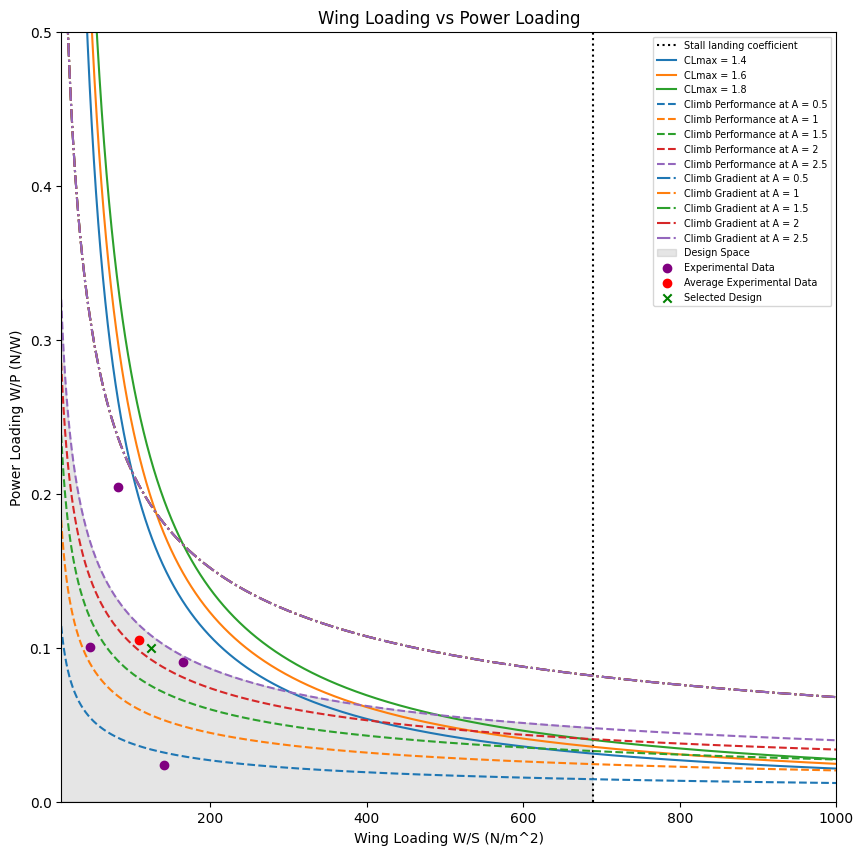

[2.14768704 2.04773924 1.96056106 ... 0.06792602 0.06792262 0.06791922]


In [183]:
import matplotlib.colors as mcolors


W_S_Selected = 125
W_P_Selected = 0.1

W_S = np.arange(1,1000,0.1)
W_P = []
for i in range(len(Clmax)):
    W_p = W_S**-1  * predicted_TOP * Clmax[i] * rho
    W_P.append(W_p)
W_p = W_p
print(W_p)

def calculate_W_over_PR(WS, eta_p, c, rho, A, C_D0,e):
    #W/Pr
    W_over_PR = eta_p / (c + np.sqrt(WS)*np.sqrt(2/rho)*(1/(1.345*((A*e)**.75)/C_D0**.25)))
    
    return W_over_PR
def calculate_W_P_br(WS,c_V,eta_p,rho,A,C_D0,CL):
    #W/Pr
    W_P_br = eta_p / (np.sqrt(WS)*(c_V+(C_D0/CL))*np.sqrt((2/rho)*(1/CL)))
    
    return W_P_br
eta_p = 0.8
e = .5
Cd0 = 0.35
A_values = [.5,1,1.5,2,2.5]
W_P_R = []
for i in range(len(A_values)):
    W_P_R.append(calculate_W_over_PR(W_S, eta_p, c, rho, A_values[i], Cd0,e))
print(W_P_R)

W_P_BR = []
CL = 1.6
c_V = 0.15
for i in range(len(A_values)):
    W_P_BR.append(calculate_W_P_br(W_S,c_V,eta_p,rho,A_values[i],Cd0,CL))

print(W_P_BR)

# WS values
WS_experimental = [
     165.328683,  81.87127183, 
    141.7429248, 47.02682539, 

]

# WP values
WP_experimental = [
     0.090833333,  0.204375, 
     0.024079125, 0.100297518, 

]

WS_experimental = np.array(WS_experimental)

# Color-blind friendly colors and line styles
color_cycle = plt.get_cmap('tab10').colors
line_styles = ['-', '--', '-.', ':']
colors = mcolors.TABLEAU_COLORS

plt.figure(figsize=(10,10))

# Plot stall speed line
plt.vlines(W_s_stall, 0, .5, label='Stall landing coefficient', color='black', linestyle='dotted')

# Plot W_p vs W_s for different Clmax
for i, cl in enumerate(Clmax):
    plt.plot(W_S, W_P[i], label=f'CLmax = {cl}', color=color_cycle[i], linestyle=line_styles[0])

# Plot W_P_R for different A values
for i, A in enumerate(A_values):
    plt.plot(W_S, W_P_R[i], label=f'Climb Performance at A = {A}', color=color_cycle[i], linestyle=line_styles[1])

# Plot W_P_BR for different A values
for i, A in enumerate(A_values):
    plt.plot(W_S, W_P_BR[i], label=f'Climb Gradient at A = {A}', color=color_cycle[i], linestyle=line_styles[2])

# Shade area under clmax 1.8
plt.fill_between(W_S, 0, W_P_R[-1], where=(W_S < W_s_stall), alpha=0.2, color='gray', label='Design Space')

# Scatter plot experimental data
plt.scatter(WS_experimental, WP_experimental, label='Experimental Data', marker='o', color='purple')
plt.scatter(np.mean(WS_experimental), np.mean(WP_experimental), label='Average Experimental Data', color='red')
plt.scatter(W_S_Selected, W_P_Selected, label='Selected Design', color='green', marker='x')

plt.ylabel('Power Loading W/P (N/W)')
plt.xlabel('Wing Loading W/S (N/m^2)')
plt.ylim(0, 0.5)
plt.xlim(10,1000)
plt.legend(fontsize='x-small')
plt.title('Wing Loading vs Power Loading')

plt.show()
print(W_P_BR[0])


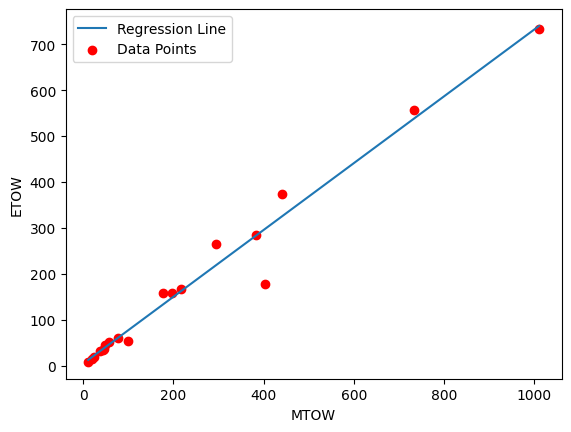

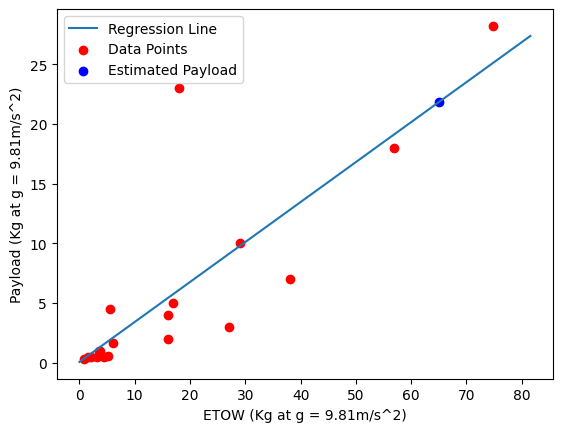

21.834286719069155
86.83428671906915


In [184]:
"""
MTOW vs ETOW
98.1	53.955
56.898	51.012
382.59	284.49
196.2	156.96
19.62	14.715
215.82	166.77
49.05	44.145
176.58	156.96
44.145	34.335
36.297	31.392
402.21	176.58
1010.99898	734.1804
441.45	372.78
46.107	36.297
294.3	264.87
10.791	7.848
24.525	19.62
76.7142	60.29399245
734.1804	557.6004


"""

MTOW = [98.1,56.898,382.59,196.2,19.62,215.82,49.05,176.58,44.145,36.297,402.21,1010.99898,441.45,46.107,294.3,10.791,24.525,76.7142,734.1804]
ETOW = [53.955,51.012,284.49,156.96,14.715,166.77,44.145,156.96,34.335,31.392,176.58,734.1804,372.78,36.297,264.87,7.848,19.62,60.29399245,557.6004]

MTOW = np.array(MTOW)
ETOW = np.array(ETOW)

# Assuming MTOW and ETOW are your data arrays
MTOW = MTOW.reshape(-1, 1)
ETOW = ETOW.reshape(-1, 1)

#fit the model
model = LinearRegression()
model.fit(MTOW, ETOW)

# Get coefficients and intercept
b = model.coef_
c = model.intercept_

# Define the function
def f(x):
    return b * x + c

# Generate linear space for plotting
x_plot = np.linspace(MTOW.min(), MTOW.max(), 100).reshape(-1, 1)
y_plot = f(x_plot)

# Plot the data and regression line
plt.plot(x_plot, y_plot, label='Regression Line')
plt.scatter(MTOW, ETOW, color='red', label='Data Points')
plt.xlabel('MTOW')
plt.ylabel('ETOW')
plt.legend()
plt.show()

#with a payload of 2kg what is the estimated ETOW

#make a etow vs diffrence of MTOW and ETOW
ETOW_diff = MTOW - ETOW
ETOW_diff = ETOW_diff.reshape(-1, 1)



#fit the model
model = LinearRegression()
model.fit(ETOW, ETOW_diff)

# Get coefficients and intercept
b = model.coef_
c = model.intercept_

# Define the function
def f(x):
    return b * x + c

# Generate linear space for plotting

x_plot = np.linspace(0,800, 100).reshape(-1, 1)
y_plot = f(x_plot)
ESTIMATE_ETOW = 65*9.81
payload = f(ESTIMATE_ETOW)[0][0]

# Plot the data and regression line
plt.plot(x_plot/9.81, y_plot/9.81, label='Regression Line')
plt.scatter(ETOW/9.81,ETOW_diff/9.81 ,color='red', label='Data Points')
plt.scatter(ESTIMATE_ETOW/9.81,payload/9.81 ,color='blue', label='Estimated Payload')
plt.ylabel('Payload (Kg at g = 9.81m/s^2)')
plt.xlabel('ETOW (Kg at g = 9.81m/s^2)')
plt.legend()
plt.show()


print(payload/9.81)

Selected_MTOW = payload + ESTIMATE_ETOW
print(Selected_MTOW/9.81)

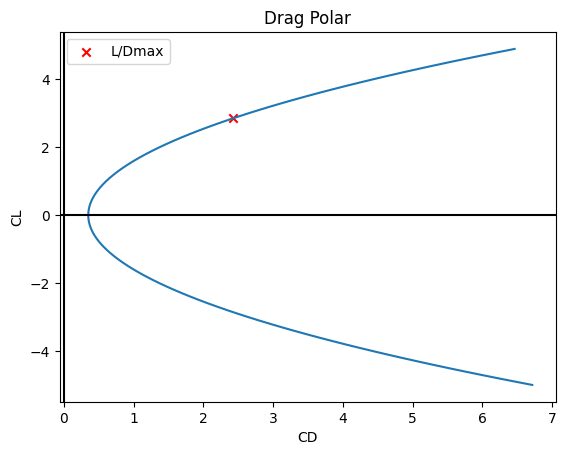

In [185]:
#drag polar
A = 2.5
CL = np.arange(-5,5,0.1)
CD = Cd0 + CL**2/(np.pi*A*e)

#L/Dmax
LDmax = np.sqrt(np.pi*A*e/Cd0)
CL_LDmax = LDmax**2/(np.pi*A*e)
CD_LDmax = Cd0 + CL_LDmax**2/(np.pi*A*e)


plt.plot(CD,CL)
plt.scatter(CD_LDmax,CL_LDmax, color='red',marker='x',label='L/Dmax')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('CD')
plt.ylabel('CL')
plt.title('Drag Polar')
plt.xlim(-.06)
plt.legend()
plt.show()


In [187]:
#Power required
print(Selected_MTOW)
print(W_P_Selected)
Pr = (W_P_Selected**-1 * Selected_MTOW)
print(Pr/1000)

851.8443527140685
0.1
8.518443527140684
